In [1]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt

DATA_PATH = "/home/giovanni/pod/thesis/code/scripts-sources/W3Pi-selection-algorithm/data/"

In [10]:
with uproot.open(DATA_PATH + "l1Nano_WTo3Pion_genmatched_PU200.root") as f:
    tree = f.get("genmatched_tree")
    branches = tree.arrays()

    print("Events with matched triplet")
    print(branches["ev_idx"].tolist())

    which_event = 16
    print(f"Looking at event #{branches['ev_idx'][which_event]}")
    print(f"Triplet: {branches['part_idxs'][which_event]}")
    print(f"Pt groups: {branches['pt_groups'][which_event]}")
    print(f"W gen mass: {branches['gen_mass'][which_event]}")

Events with matched triplet
[1, 6, 9, 22, 24, 28, 37, 38, 41, 48, 56, 57, 66, 68, 79, 80, 88, 90, 104, 117, 131, 132, 134, 135, 139, 142, 145, 146, 151, 158, 161, 165, 174, 177, 184, 187, 188, 201, 202, 210, 215, 219, 224, 237, 242, 245, 249, 250, 252, 257, 260, 261, 262, 263, 266, 270, 273, 274, 277, 296, 298, 300, 303, 321, 324, 325, 329, 334, 342, 345, 349, 350, 352, 353, 354, 355, 357, 363, 368, 372, 377, 382, 383, 385, 388, 389, 390, 399, 401, 407, 419, 420, 421, 422, 424, 428, 436, 440, 442, 445, 452, 456, 459, 467, 470, 471, 472, 475, 476, 483, 486, 489, 504, 505, 516, 519, 533, 536, 543, 544, 548, 560, 561, 564, 573, 576, 578, 589, 590, 611, 612, 614, 616, 617, 618, 622, 623, 625, 632, 637, 639, 646, 649, 654, 663, 674, 677, 680, 683, 684, 694, 696, 699, 700, 701, 704, 710, 724, 726, 730, 732, 736, 749, 751, 753, 755, 761, 762, 778, 779, 789, 791, 800, 801, 805, 809, 812, 813, 823, 826, 828, 830, 834, 840, 845, 849, 861, 866, 873, 875, 877, 883, 884, 885, 886, 891, 896, 897, 89

Events with reconstructed triplet
[1, 6, 68, 88, 158, 174, 188, 249, 252, 257, 261, 262, 298, 345, 352, 355, 377, 383, 385, 390, 420, 421, 456, 459, 475, 486, 489, 504, 519, 589, 617, 618, 622, 625, 637, 639, 654, 663, 694, 696, 699, 753, 762, 778, 779, 800, 801, 828, 861, 873, 884, 897, 899, 910, 930, 934, 968, 980, 1048, 1073, 1090, 1145, 1158, 1163, 1204, 1231, 1241, 1257, 1281, 1326, 1368, 1425, 1459, 1515, 1525, 1526, 1578, 1588, 1589, 1599, 1634, 1640, 1645, 1660, 1746, 1748, 1769, 1776, 1808, 1820, 1821, 1837, 1864, 1869, 1893, 1921, 1937, 1946, 1959, 1975, 1992, 2025, 2030, 2040, 2100, 2126, 2185, 2192, 2194, 2216, 2229, 2235, 2256, 2265, 2298, 2304, 2352, 2354, 2358, 2371, 2429, 2454, 2467, 2468, 2517, 2559, 2567, 2570, 2575, 2626, 2630, 2634, 2635, 2639, 2667, 2680, 2692, 2698, 2710, 2763, 2780, 2811, 2843, 2868, 2871, 2883, 2921, 2960, 2967, 3012, 3020, 3033, 3043, 3060, 3124, 3126, 3149, 3171, 3172, 3177, 3178, 3185, 3246, 3249, 3293, 3307, 3331, 3338, 3340, 3390, 3395, 342

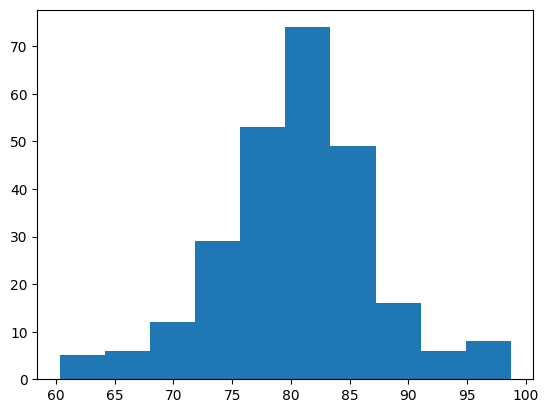

In [11]:
with uproot.open(DATA_PATH + "l1Nano_WTo3Pion_reco_PU200_v1.root") as f:
    tree = f.get("reco_tree")
    branches = tree.arrays()

    which_event = 3
    ev_idxs = branches["ev_idx"]    
    print("Events with reconstructed triplet")
    print(ev_idxs.tolist())
    print(f"Looking at event #{ev_idxs[which_event]}")
    print(f"Triplet: {branches['part_idxs'][which_event]}")
    print(f"Invariant mass: {branches['reco_mass'][which_event]}")


    plt.hist(branches["reco_mass"])

In [25]:
import numpy as np

a = np.array([1, 2, 4, 3, 6])
b = 2

np.where(a == b)[0][0]

np.int64(1)